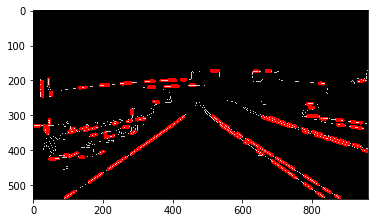

In [5]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline


# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 11
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

(array([  1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,  10.,
         26.,  24.,  10.,  15.,   3.,   8.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1196.  , -1086.88,  -977.76,  -868.64,  -759.52,  -650.4 ,
         -541.28,  -432.16,  -323.04,  -213.92,  -104.8 ,     4.32,
          113.44,   222.56,   331.68,   440.8 ,   549.92,   659.04,
          768.16,   877.28,   986.4 ,  1095.52,  1204.64,  1313.76,
         1422.88,  1532.  ,  1641.12,  1750.24,  1859.36,  1968.48,
         2077.6 ,  2186.72,  2295.84,  2404.96,  2514.08,  2623.2 ,
         2732.32,  2841.44,  2950.56,  3059.68,  3168.8 ,  3277.92,
         3387.04,  3496.16,  3605.28,  3714.4 ,  3823.52,  3932.64,
         4041.76,  4150.88,  4260.  ]),
 <a list of 50 Patch objects>)

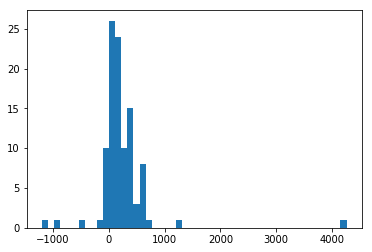

In [25]:
plt.hist(lines[:,:,3] - ((lines[:,:,3] - lines[:,:,1]) / (lines[:,:,2]-lines[:,:,0]+1))*lines[:,:,2], bins=50)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   4.,   1.,   1.,   1.,   1.,   0.,   2.,
          0.,   3.,   3.,   5.,   2.,   5.,  18.,   0.,   3.,   4.,   0.,
          3.,   1.,   9.,   0.,   0.,   7.,   5.,   6.,   1.,   4.,   5.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.]),
 array([ -2.00000000e+00,  -1.95000000e+00,  -1.90000000e+00,
         -1.85000000e+00,  -1.80000000e+00,  -1.75000000e+00,
         -1.70000000e+00,  -1.65000000e+00,  -1.60000000e+00,
         -1.55000000e+00,  -1.50000000e+00,  -1.45000000e+00,
         -1.40000000e+00,  -1.35000000e+00,  -1.30000000e+00,
         -1.25000000e+00,  -1.20000000e+00,  -1.15000000e+00,
         -1.10000000e+00,  -1.05000000e+00,  -1.00000000e+00,
         -9.50000000e-01, 

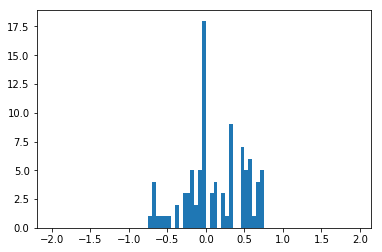

In [36]:
plt.hist((lines[:,:,3] - lines[:,:,1]) / (lines[:,:,2]-lines[:,:,0]+1), bins=np.arange(-2,2,0.05))